# Analyse des loyers parisiens

In [1]:
import scrape
results = scrape.parse_pages()

In [2]:
results

,loyer (€),type,surface (m²),nb_pieces,emplacement,description
0,990,appartement,30,2,75016,Appartement Paris 2 pièce(s) 30 m2 - Paris 16è...
1,1734,appartement,60,3,75010,"Rue du Faubourg Saint Martin, face à la mairie..."
2,1150,appartement,36,2,75017,75017 paris rue cardinet face au parc martin l...
3,3100,appartement,92,3,75006,Institut de France rue de Seine entre cour d'h...
4,3550,appartement,115,4,75007,"Entre les métros VANNEAU et DUROC, rue de Sèvr..."
...,...,...,...,...,...,...
15,835,studio,26,1,75012,Avenue du Dr Arnold Netter - proche de la rue ...
16,1565,appartement,53,2,75015,- Métro Lourmel. Au 4ème étage dans une réside...
17,890,studio,29,1,75020,Métro PELLEPORT Dans un immeuble récent bien t...
18,1529,appartement,58,2,75012,"Dans résidence avec gardien, bel appartement t..."


In [3]:
results.describe()

,loyer (€),surface (m²),nb_pieces
count,401.000000,401.000000,401.000000
mean,1563.663342,46.458853,2.122195
std,1145.751288,34.820596,1.248011
min,380.000000,8.000000,1.000000
25%,895.000000,24.000000,1.000000
50%,1250.000000,38.000000,2.000000
75%,1800.000000,58.000000,3.000000
max,10858.000000,317.000000,8.000000


In [4]:
results["loyer / m²"] = results["loyer (€)"] / results["surface (m²)"]
results.describe()

,loyer (€),surface (m²),nb_pieces,loyer / m²
count,401.000000,401.000000,401.000000,401.000000
mean,1563.663342,46.458853,2.122195,36.363029
std,1145.751288,34.820596,1.248011,9.818423
min,380.000000,8.000000,1.000000,6.125000
25%,895.000000,24.000000,1.000000,30.000000
50%,1250.000000,38.000000,2.000000,33.695652
75%,1800.000000,58.000000,3.000000,40.538462
max,10858.000000,317.000000,8.000000,89.521739


In [5]:
results.groupby("emplacement")["loyer / m²"].mean().sort_values(ascending=False)

emplacement
75006    44.257802
75011    43.484435
75005    42.951214
75003    42.471485
75017    41.406412
75002    41.292231
75001    41.005818
75008    39.171474
75007    38.987068
75116    37.864762
75004    37.555871
75016    35.670536
75018    34.661861
75009    34.381299
75019    33.668713
75020    33.215195
75010    32.784004
75015    32.590482
75013    32.082195
75014    31.856699
75012    29.821632
Name: loyer / m², dtype: float64

<AxesSubplot:xlabel='nb_pieces', ylabel='loyer / m²'>

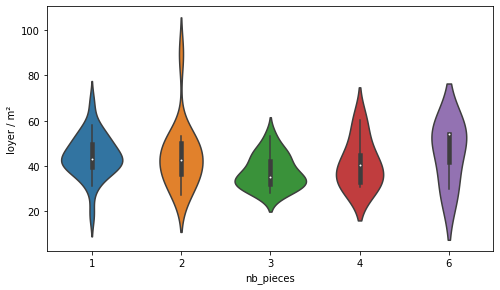

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,4.5)

sns.violinplot(x="nb_pieces", y="loyer / m²", data=results[results["emplacement"] < "75007"])

<AxesSubplot:xlabel='nb_pieces', ylabel='emplacement'>

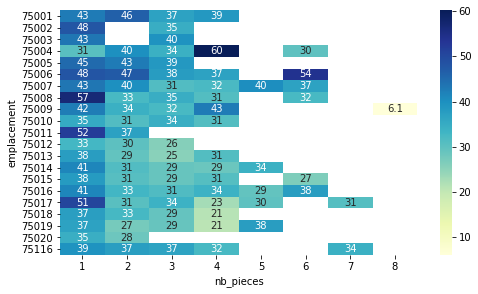

In [56]:
homes = results.groupby(["emplacement", "nb_pieces"])["loyer / m²"].mean().to_frame()
homes = homes.reset_index()
homes = homes.pivot("emplacement", "nb_pieces", "loyer / m²")
sns.heatmap(homes, annot=True, cmap="YlGnBu")